<a href="https://colab.research.google.com/github/HeronSales/kaggle_Titanic/blob/main/titanic_getting_started_with_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This is my first analysis publishing in kaggle, I hope that you like and let me a feed back about anything including grammar.

I chose to compare some Machine Learning models who usually works as decision tree classifiers. The final chose model it's that have the best hit percentage, after that the model will be use to answer the test data set.

This kernel has four main sections; Null data, Extracting Features, Training data analysis and Model. If you have any idea that might improve this kernel, please be sure to comment, or fork and experiment as you like. If you didn't understand any part, feel free to ask.

In [5]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)   

In [6]:
# Import data
train_data = pd.read_csv('/content/train.csv')
test_data_final = pd.read_csv('/content/test.csv')

In [7]:
# Looking until fifth row of dataframe
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_data_final.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Information Provided by the Kaggle

* PassengerId is the unique id of the row and it doesn't have any effect on target
* Survived is the target variable we are trying to predict (0 or 1):
 * 1 = Survived
 * 0 = Not Survived
* Pclass (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
 * 1 = Upper Class
 * 2 = Middle Class
 * 3 = Lower Class
* Name, Sex and Age
* SibSp is the total number of the passengers' siblings and spouse
* Parch is the total number of the passengers' parents and children
* Ticket is the ticket number of the passenger
* Fare is the passenger fare
* Cabin is the cabin number of the passenger
* Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
 * C = Cherbourg
 * Q = Queenstown
 * S = Southampton

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Null values in both the training and test data, in both the Cabin and Age column. Thus, the Cabin column of this analysis was discarded, for the Age column the missing values were replaced, based on the average age of the passengers considering the Pclass and Sex.

# Null data

In [11]:
null_train = train_data.isnull().sum()
null_test = test_data_final.isnull().sum()
pd.DataFrame([null_train, null_test],index=['Train_Data', 'Test_Data'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Train_Data,0.0,0.0,0.0,0.0,0.0,177.0,0.0,0.0,0.0,0.0,687.0,2.0
Test_Data,0.0,NaN,0.0,0.0,0.0,86.0,0.0,0.0,0.0,1.0,327.0,0.0


Null data at columns Age, Fare e Embarked. The Test_Data's Survived column, because it isn't have this column.

## Fare

In [12]:
test_data_final[test_data_final['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [13]:
# finding a fare value for Storey, Mr. Thomas.
Fare_Mr_Thomas = train_data.query('Pclass == 3 & Embarked == "S" & Sex == "male" & Age >= 60').Fare.mean()
Fare_Mr_Thomas

7.00625

In [14]:
test_data_final['Fare'].fillna(Fare_Mr_Thomas, inplace = True)
test_data_final[test_data_final['Fare'].isnull()].sum()

PassengerId    0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64

## Embarked

In [15]:
train_data[train_data['Embarked'].isnull()] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [16]:
train_data.query('Pclass == 1  & Fare > 70  & Fare < 90 ')['Embarked'].unique()

array(['C', nan, 'S'], dtype=object)

Missing values in Embarked are filled with S with this information.

> "When I googled Stone, Mrs. George Nelson (Martha Evelyn), I found that she embarked from S (Southampton) with her maid Amelie Icard, in this page Martha Evelyn Stone: Titanic Survivor."

> "Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28."

**Reference**: https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial/notebook


---

In [17]:
# Substuctin the values of Miss. Amelie ans Mrs. Gerorge
train_data['Embarked'].fillna('S', inplace = True)
train_data[train_data['Embarked'].isnull()].sum()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64

## Age

In [18]:
age_null = train_data[train_data['Age'].isnull()]
age_null.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S
760,761,0,3,"Garfirth, Mr. John",male,NaN,0,0,358585,14.5000,NaN,S
497,498,0,3,"Shellard, Mr. Frederick William",male,NaN,0,0,C.A. 6212,15.1000,NaN,S
596,597,1,2,"Leitch, Miss. Jessie Wills",female,NaN,0,0,248727,33.0000,NaN,S


In [19]:
age_null.groupby(['Pclass','Embarked', 'Sex']).Sex.count()

Pclass  Embarked  Sex   
1       C         female     5
                  male       6
        S         female     4
                  male      15
2       C         male       2
        Q         female     1
        S         female     1
                  male       7
3       C         female     7
                  male      18
        Q         female    23
                  male      25
        S         female    12
                  male      51
Name: Sex, dtype: int64

In [20]:
# adopted values
colunaum = train_data.groupby(['Sex', 'Pclass']).Age.mean().round()
colunaum

Sex     Pclass
female  1         35.0
        2         29.0
        3         22.0
male    1         41.0
        2         31.0
        3         27.0
Name: Age, dtype: float64

correcting dataframe ages 

In [21]:
conveter = colunaum.to_dict()

In [22]:
# Train_Data
coluna_final = []

for index, row in train_data.iterrows():
  Sex = row['Sex']
  pclass = row['Pclass']
  Age_nan = np.isnan(row['Age'])
  Age_table = row['Age']
  if (Age_nan == True):
    objeto_valo = conveter[Sex, pclass]
    coluna = [Age_nan, Sex, pclass, objeto_valo]
    coluna_final.append(coluna)
  else:
    coluna = [Age_nan, Sex, pclass, Age_table]
    coluna_final.append(coluna)


Corret_age = pd.DataFrame(coluna_final, columns = ['Age_cond', 'Sex', 'Pclass', 'key'])
Corret_age

,Age_cond,Sex,Pclass,key
0,False,male,3,22.0
1,False,female,1,38.0
2,False,female,3,26.0
3,False,female,1,35.0
4,False,male,3,35.0
...,...,...,...,...
886,False,male,2,27.0
887,False,female,1,19.0
888,True,female,3,22.0
889,False,male,1,26.0


In [23]:
# replacing the values
train_data['Age'] = Corret_age.key

In [24]:
# Test_data
coluna_final = []

for index, row in test_data_final.iterrows():
  Sex = row['Sex']
  pclass = row['Pclass']
  Age_nan = np.isnan(row['Age'])
  Age_table = row['Age']
  if (Age_nan == True):
    objeto_valo = conveter[Sex, pclass]
    coluna = [Age_nan, Sex, pclass, objeto_valo]
    coluna_final.append(coluna)
  else:
    coluna = [Age_nan, Sex, pclass, Age_table]
    coluna_final.append(coluna)


Corret_age = pd.DataFrame(coluna_final, columns = ['Age_cond', 'Sex', 'Pclass', 'key'])
Corret_age

,Age_cond,Sex,Pclass,key
0,False,male,3,34.5
1,False,female,3,47.0
2,False,male,2,62.0
3,False,male,3,27.0
4,False,female,3,22.0
...,...,...,...,...
413,True,male,3,27.0
414,False,female,1,39.0
415,False,male,3,38.5
416,True,male,3,27.0


In [25]:
# replacing the values
test_data_final['Age'] = Corret_age.key

# Extracting Features

The treatment pronouns contained in the data, in the Name column, provide important information. In this way the feature class was added to the data.

In [26]:
pronoun_train = train_data['Name']
pronoun_train = pronoun_train.str.split('(', expand=True)[0]
pronoun_test = test_data_final['Name'].str.split('(', expand=True)[0]

In [27]:
lista_de_nomes = ['Mr','Mrs','Miss','Ms','Sir','Lady','Dr','Mme','Mlle','Countess','Col','Major','Capt','Don','Rev','Master','Jonkheer']
teste = pronoun_train.str[0:].str.extractall(r"(?P<pronome>\w+)")
teste = teste.rename(columns={'pronome': 'nomes'})
teste = teste.value_counts()
teste.loc[lista_de_nomes]

nomes   
Mr          517
Mrs         125
Miss        182
Ms            1
Sir           1
Lady          1
Dr            7
Mme           1
Mlle          2
Countess      1
Col           2
Major         2
Capt          1
Don           1
Rev           6
Master       40
Jonkheer      1
dtype: int64

In [28]:
contar = teste.loc[['Mr','Mrs','Miss','Ms','Sir','Lady','Dr','Mme','Mlle','Countess','Col','Major','Capt','Don','Rev','Master','Jonkheer']].sum()
contar

891

Based on the quantitative above, it was considered the classification into three categories:
* Mr - all male pronouns
* Miss - All feminine pronouns except Countess
* Dr.\Sir.\Capt.\Rev. - All other treatment pronouns found

In [29]:
female_pronouns = ['Mrs','Miss','Ms','Lady','Mme','Mlle']
female_pronouns_test_data = ['Mrs','Miss','Ms','Lady','Mme','Mlle','Dona']
pronoun_other_categories = ['Sir','Dr','Col','Major','Capt','Don','Rev','Jonkheer', 'Countess', 'Master', 'the Countess']
# train_data['Name'].str.replace(('Mrs','Miss','Ms','Lady','Mme','Mlle','Countess'), 'Miss')

train_data['classes'] = pronoun_train.str[0:].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
test_data_final['classes'] = pronoun_test.str[0:].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,classes
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,31.0,0,0,239854,0.0000,NaN,S,Mr
405,406,0,2,"Gale, Mr. Shadrach",male,34.0,1,0,28664,21.0000,NaN,S,Mr
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S,Mrs
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S,Mr
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C,Miss
688,689,0,3,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,NaN,S,Mr
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,Mr
450,451,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S,Mr
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S,Mr
273,274,0,1,"Natsch, Mr. Charles H",male,37.0,0,1,PC 17596,29.7000,C118,C,Mr


In [30]:
train_data['classes'].replace(female_pronouns, 'Miss',inplace=True)
train_data['classes'].replace(pronoun_other_categories, 'Dr.\Sir.\Capt.\Rev.',inplace=True)
test_data_final['classes'].replace(female_pronouns_test_data, 'Miss',inplace=True)
test_data_final['classes'].replace(pronoun_other_categories, 'Dr.\Sir.\Capt.\Rev.',inplace=True)

In [31]:
train_data.classes.value_counts()

Mr                     517
Miss                   312
Dr.\Sir.\Capt.\Rev.     62
Name: classes, dtype: int64

In [32]:
test_data_final.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,classes
130,1022,3,"Spinner, Mr. Henry John",male,32.0,0,0,STON/OQ. 369943,8.0500,NaN,S,Mr
125,1017,3,"Cribb, Miss. Laura Alice",female,17.0,0,1,371362,16.1000,NaN,S,Miss
224,1116,1,"Candee, Mrs. Edward (Helen Churchill Hungerford)",female,53.0,0,0,PC 17606,27.4458,NaN,C,Miss
314,1206,1,"White, Mrs. John Stuart (Ella Holmes)",female,55.0,0,0,PC 17760,135.6333,C32,C,Miss
318,1210,3,"Jonsson, Mr. Nils Hilding",male,27.0,0,0,350408,7.8542,NaN,S,Mr
375,1267,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,NaN,C,Miss
175,1067,2,"Brown, Miss. Edith Eileen",female,15.0,0,2,29750,39.0000,NaN,S,Miss
187,1079,3,"Davies, Mr. Joseph",male,17.0,2,0,A/4 48873,8.0500,NaN,S,Mr
305,1197,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S,Miss
349,1241,2,"Walcroft, Miss. Nellie",female,31.0,0,0,F.C.C. 13528,21.0000,NaN,S,Miss


## Families

In [33]:
testando = pd.concat([train_data['Name'].str[0:].str.split(', ', expand=True)[0], test_data_final['Name'].str[0:].str.split(', ', expand=True)[0]])
totais = pd.Series(testando.value_counts())
totais = totais.to_dict()

In [34]:
lista_da_familia = []
for index, row in train_data.iterrows():
  nome = row['Name'].split(',')[0]
  if (totais[nome] <= 1):
    lista_da_familia.append('Alone')
  elif (totais[nome] <= 3):
    lista_da_familia.append('Small')
  elif (totais[nome] <= 6):
    lista_da_familia.append('Medium')
  else:
    lista_da_familia.append('Large')
  
train_data['Family_size'] = lista_da_familia
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,classes,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Miss,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Miss,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Dr.\Sir.\Capt.\Rev.,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,Small
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,Medium
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,Alone


In [35]:
lista_da_familia = []
for index, row in test_data_final.iterrows():
  nome = row['Name'].split(',')[0]
  if (totais[nome] <= 1):
    lista_da_familia.append('Alone')
  elif (totais[nome] <= 3):
    lista_da_familia.append('Small')
  elif (totais[nome] <= 6):
    lista_da_familia.append('Medium')
  else:
    lista_da_familia.append('Large')
  
test_data_final['Family_size'] = lista_da_familia
test_data_final

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,classes,Family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,Medium
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Miss,Alone
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,Alone
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,Alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Miss,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S,Mr,Alone
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Miss,Alone
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,Alone
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S,Mr,Medium


In [36]:
train_data[['Family_size', 'Survived']].value_counts()

Family_size  Survived
Alone        0           298
             1           149
Small        0           146
             1           143
Medium       0            82
             1            44
Large        0            23
             1             6
dtype: int64

# Training data analysis

In [37]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.382907,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.260272,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
corr = train_data.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.039494,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069008,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.403445,0.083081,0.018443,-0.549500
Age,0.039494,-0.069008,-0.403445,1.000000,-0.251112,-0.182099,0.116836
SibSp,-0.057527,-0.035322,0.083081,-0.251112,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.182099,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.116836,0.159651,0.216225,1.000000


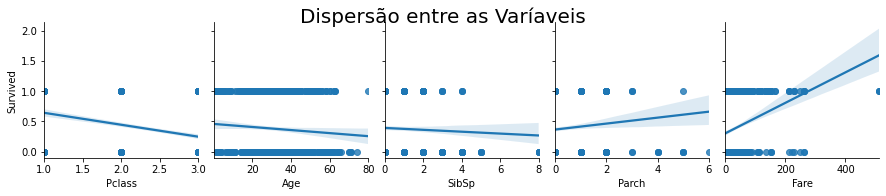

In [39]:
import seaborn as sns
ax = sns.pairplot(train_data, y_vars="Survived", x_vars=["Pclass", 'Age', 'SibSp', 'Parch', 'Fare'],kind='reg', diag_kind=None)
ax.fig.suptitle('Dispersão entre as Varíaveis', fontsize=20, y=1.05)
ax

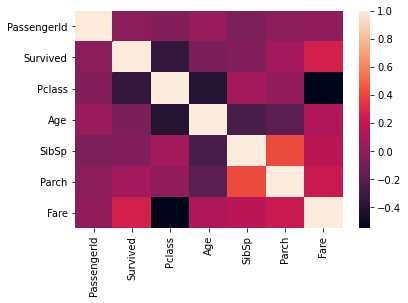

In [40]:
import seaborn as sns
ax = sns.heatmap(corr)
ax

Based on the table and correlation graphs, one realizes that there is no linear relationship considerably between features. Emphasizing only that Pclass and Fare have a significant and expected negative correlation, since the price increases and the class decreases and if the price decreases the class increases, inversely proportional. Another relationship is between Parch and Sibsp, which has to do with the degree of kinship, showing a positive correlation.

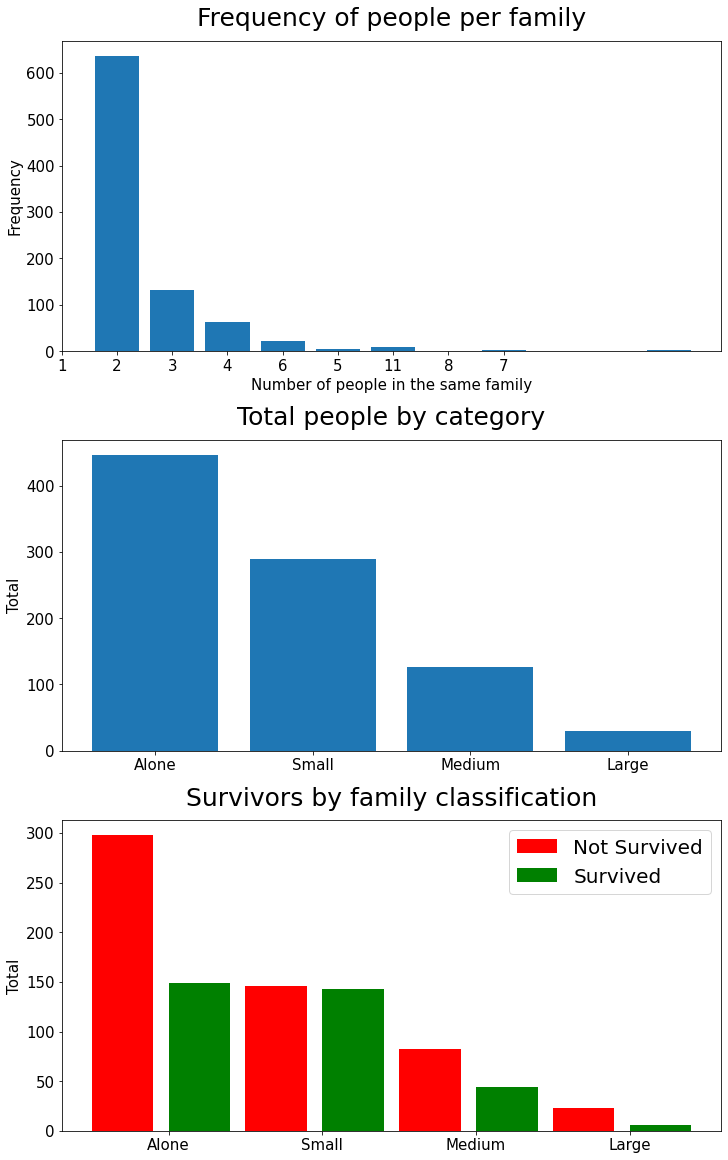

In [41]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

family_freq = testando.value_counts().value_counts() 

legenda = train_data.Family_size.value_counts().index


fig2 = plt.figure(constrained_layout=True, figsize=(10,16))

spec2 = gridspec.GridSpec(ncols=1, nrows=3, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[1, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])


f2_ax1.bar(legenda, train_data.Family_size.value_counts())
f2_ax1.set_title('Total people by category', fontsize=25, pad=15)
f2_ax1.set_ylabel('Total', fontsize=15)
f2_ax1.tick_params(labelsize=15)

# Frequancia de pessoas por familia
f2_ax2.bar(family_freq.index.values, family_freq.values)
f2_ax2.set_xticks(range(0,9))
f2_ax2.set_xticklabels(family_freq.index.values)
f2_ax2.set_title('Frequency of people per family', fontsize=25, pad=15)
f2_ax2.set_xlabel('Number of people in the same family', fontsize=15)
f2_ax2.set_ylabel('Frequency', fontsize=15)
f2_ax2.tick_params(labelsize=15)

f2_ax3.bar(range(0,8,2), train_data[['Family_size', 'Survived']].value_counts()[:,0],color='red', label='C1',align= 'edge')
f2_ax3.bar(range(1,8,2), train_data[['Family_size', 'Survived']].value_counts()[:,1], color='green', label='C2',align= 'edge')
f2_ax3.set_xticks(range(1,8,2))
f2_ax3.set_xticklabels(legenda)
f2_ax3.legend(['Not Survived', 'Survived'], fontsize=20,loc=0)
f2_ax3.set_title('Survivors by family classification', fontsize=25, pad=15)
f2_ax3.set_ylabel('Total', fontsize=15)
f2_ax3.tick_params(labelsize=15)

Text(27.0, 35, 'average')

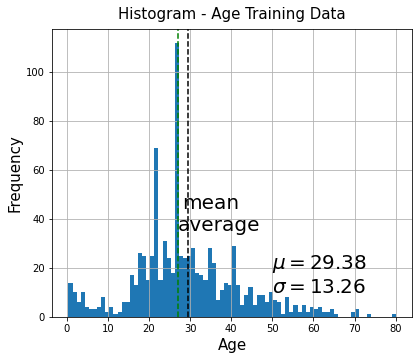

In [42]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

mu, sigma = train_data['Age'].mean(), train_data['Age'].std()

eixo.hist(train_data['Age'], bins=80)
eixo.set_title('Histogram - Age Training Data', fontsize=15, pad=10)
eixo.set_xlabel('Age', fontsize=15)
eixo.set_ylabel('Frequency', fontsize=15)
eixo.grid(True)

eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
               xy=(50, 10), fontsize=20)

eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('mean', xy=(mu-1.3, 44), fontsize=20)

eixo.axvline(train_data['Age'].median(), color='g', linestyle='--')
eixo.annotate('average', xy=(train_data['Age'].median(), 35), fontsize=20)

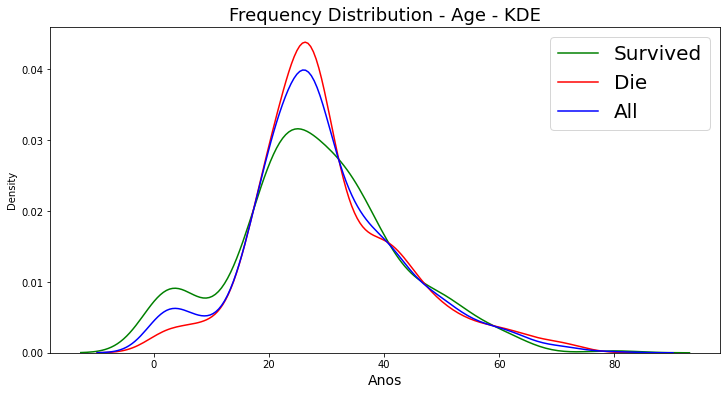

In [43]:
import seaborn as sns

sobreviveram = train_data[train_data.Survived == 1]
morreram = train_data[train_data.Survived == 0]
cores = {'Survived': 'g','Die': 'r', 'All': 'b'}

ax = sns.kdeplot(sobreviveram.Age, color='g')
ax = sns.kdeplot(morreram.Age, color='r')
ax = sns.kdeplot(train_data.Age, color='b')

ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency Distribution - Age - KDE', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax.legend(cores, fontsize=20)
ax

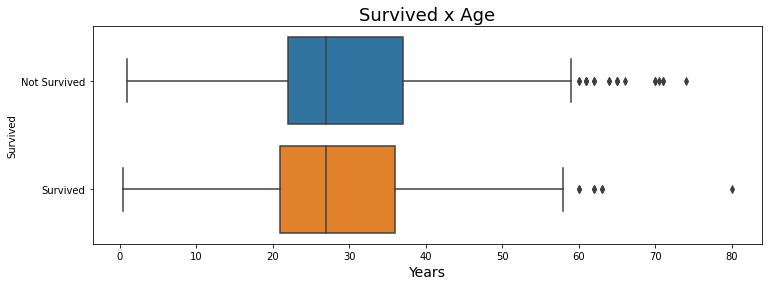

In [44]:
train_data.Sex.bool
ax = sns.boxplot( x = 'Age', y = 'Survived', data = train_data , orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Survived x Age', fontsize=18)
ax.set_xlabel('Years', fontsize=14)
ax.set_yticklabels(['Not Survived','Survived'])
ax

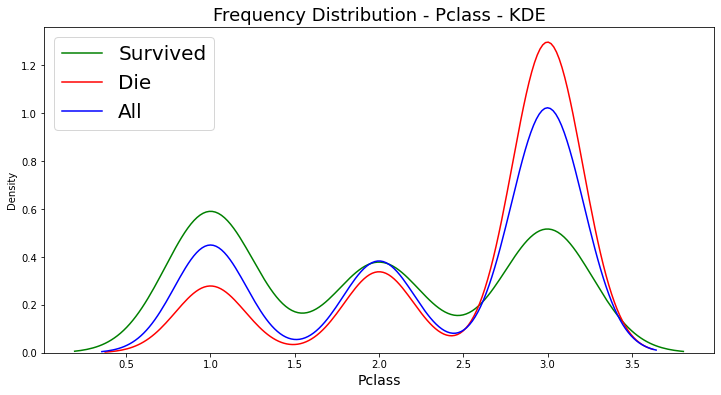

In [45]:
sobreviveram = train_data[train_data.Survived == 1]
morreram = train_data[train_data.Survived == 0]
cores = {'Survived': 'g','Die': 'r', 'All': 'b'}

ax = sns.kdeplot(sobreviveram.Pclass, color='g')
ax = sns.kdeplot(morreram.Pclass, color='r')
ax = sns.kdeplot(train_data.Pclass, color='b')

ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency Distribution - Pclass - KDE', fontsize=18)
ax.set_xlabel('Pclass', fontsize=14)
ax.legend(cores, fontsize=20)
ax

Text(0.5, 1.0, 'Percentage of passengers by sex')

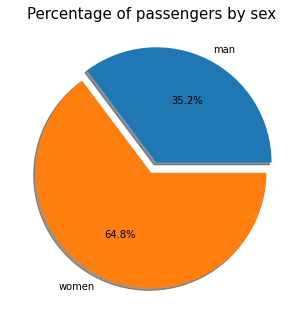

In [46]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.pie(train_data.groupby('Sex').PassengerId.count(), labels=['man', 'women'],
         autopct='%.1f%%',explode=[0.1,0], shadow=True)
eixo.set_title('Percentage of passengers by sex', size=15, pad=10)

Text(0.5, 1.0, 'Total survivors and deaths by sex')

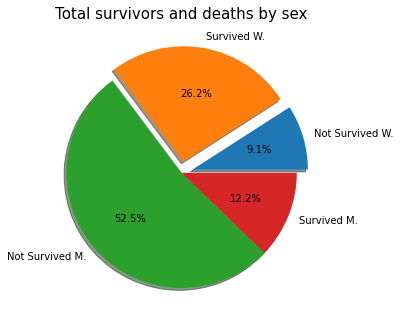

In [47]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
eixo.pie(train_data.groupby(['Sex', 'Survived']).Survived.count(),labels=['Not Survived W.', 'Survived W.','Not Survived M.','Survived M.'],
         autopct='%.1f%%',explode=[0.1,0.1,0,0], shadow=True)
eixo.set_title('Total survivors and deaths by sex', size=15, pad=10)

In [48]:
train_data.groupby(['Sex', 'Survived']).Survived.count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [49]:
women = train_data.query('Sex == "female"')
women_survived = len(women.query('Survived == 1'))
women_survived_percent = (women_survived)/(women.shape[0])
print('Total of women: {}, total of survived women: {:.4%}({})'.format(women.shape[0],
                                                                   women_survived_percent,
                                                                   women_survived))

Survive = {0: 'No',
           1: 'Yes'}

Class = {1: '1º - Class',
         2: '2º - Class',
         3: '3º - Class'}
df_women_percent = pd.crosstab(women.Survived,
                               women.Pclass,
                               normalize = True) * 100
df_women_percent.rename(index = Survive, inplace = True)
df_women_percent.rename(columns = Class, inplace = True)
df_women_percent

Total of women: 314, total of survived women: 74.2038%(233)


Pclass,1º - Class,2º - Class,3º - Class
Survived,,,
No,0.955414,1.910828,22.929936
Yes,28.980892,22.292994,22.929936


In [50]:
women.groupby(['Pclass','Embarked']).Age.describe()

count       mean        std    min    25%   50%    75%   max
Pclass Embarked                                                              
1      C          43.0  35.930233  12.265700  16.00  24.00  35.0  44.00  60.0
       Q           1.0  33.000000        NaN  33.00  33.00  33.0  33.00  33.0
       S          50.0  33.580000  13.639813   2.00  22.25  35.0  39.75  63.0
2      C           7.0  19.142857   8.706866   3.00  15.50  22.0  25.00  28.0
       Q           2.0  29.500000   0.707107  29.00  29.25  29.5  29.75  30.0
       S          67.0  29.708955  12.870317   2.00  24.00  29.0  37.00  57.0
3      C          23.0  16.478261  10.328940   0.75  11.00  17.0  22.00  45.0
       Q          33.0  22.257576   4.351941  15.00  22.00  22.0  22.00  39.0
       S          88.0  23.056818  12.043368   1.00  18.00  22.0  29.25  63.0

In [51]:
men = train_data.query('Sex == "male"')
men_survived = len(men.query('Survived == 1'))
men_survived_percent = (men_survived)/(men.shape[0])
print('Total of men: {}, total of survived men: {:.4%}({})'.format(men.shape[0],
                                                                   men_survived_percent,
                                                                   men_survived))


df_men_percent = pd.crosstab(men.Survived,
                               men.Pclass,
                               normalize = True) * 100
df_men_percent.rename(index = Survive, inplace = True)
df_men_percent.rename(columns = Class, inplace = True)
df_men_percent

Total of men: 577, total of survived men: 18.8908%(109)


Pclass,1º - Class,2º - Class,3º - Class
Survived,,,
No,13.344887,15.771231,51.993068
Yes,7.798960,2.946274,8.145581


In [52]:
import plotly.graph_objects as go
import numpy as np
Series_1 = train_data.query('Survived == 1')
Series_2 = train_data.query('Survived == 0')
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=Series_1['PassengerId'], 
                           y=Series_1['Age'], z=Series_1['Pclass'],name='Survived', 
                           mode='markers', 
                           marker=dict(size=5,
                           color='green',                # set color to an array/list of desired values
                           colorscale='Viridis',   # choose a colorscale
                           opacity=0.8),
                           text= 'agrupador'))

fig.add_trace(go.Scatter3d(x=Series_2['PassengerId'], 
                           y=Series_2['Age'], z=Series_2['Pclass'],name='Not Survived', 
                           mode='markers', 
                           marker=dict(size=5,
                           color='red',                # set color to an array/list of desired values
                           colorscale='Viridis',   # choose a colorscale
                           opacity=0.8),
                           text= 'agrupador'))

fig.update_layout(scene=dict(xaxis_title='PassengerId',
                             yaxis_title='Age', zaxis_title='Pclass'))

fig.update_layout(scene = dict(
                    zaxis = dict(
                        ticktext= ['1º - Class','2º - Class','3º - Class'],
                        tickvals= [1, 2, 3]))                    
                  )


fig.show()

## Training Data Considerations 

Based on training data, graphs and tables, it is noted that most of the deaths were of people in 3rd class (Pclass), among the genders the most affected was men, 75% of the people who did not survive had below 37 years.

# Model

In [53]:
# functions

def fit_and_predict(name, model, train_data, train_mark, test_data, test_mark):
    model.fit(train_data, train_mark)

    result = model.predict(test_data)

    hits = result == test_mark

    total_hits = sum(hits) 
    total_elements = len(test_data)

    hit_rate = 100.0 * total_hits / total_elements

    msg = "Algorithm Hit Rate {0}: {1}".format(name, hit_rate)
    
    print('classification result %.2f%%' %(model.score(test_data, test_mark)*100))
    print(msg)
    return hit_rate

def real_test(best, model, data_validation, mark_validation):
    result = model.predict(data_validation)
    hits = result == mark_validation

    total_hits = sum(hits)
    total_elements = len(mark_validation)

    hit_rate = 100.0 * total_hits / total_elements

    msg = "Winner hit rate {1} in the real world: {0}".format(hit_rate, best)
    print(msg)

def best_train_predict(name, model, train_data, train_mark, test_data_final, ID):
    model.fit(train_data, train_mark)

    predictions = model.predict(test_data_final)
    output = pd.DataFrame({'PassengerId': ID, 'Survived': predictions})
    output.to_csv('my_submission.csv', index=False)
    
    
    s = len(output[output.Survived==1])
    d = len(output[output.Survived==0])

    msg = "Algoritmo: {0} - S: {1} - D: {2}".format(name, s, d)

    print(msg)
    return output

Created 5 Classifiers and selected the best one

In [54]:
features = ["Pclass", "Sex","Age" , "SibSp", "Parch", "Embarked", "Fare", "classes", 'Family_size']
X_df = train_data[features]
Y_df = train_data["Survived"]

Xdummies_df = pd.get_dummies(X_df)
Ydummies_df = Y_df

X = Xdummies_df.values
Y = Ydummies_df.values 

training_percentage = 0.3
test_percentage = 0.6

train_size = int(training_percentage * len(Y))
test_size = int(test_percentage * len(Y))
validation_size = len(Y) - train_size - test_size

train_data_x = X[:train_size]
train_mark_y = Y[:train_size]

test_end = train_size + test_size

test_data = X[train_size:test_end]
test_mark = Y[train_size:test_end]

data_validation = X[test_end:]
mark_validation = Y[test_end:]

# ------------------------------------------------------------------------------------------------------------------------------


from collections import Counter
from sklearn.naive_bayes import MultinomialNB
modelMultinomial = MultinomialNB()
resultMultinomial = fit_and_predict("MultinomialNB", modelMultinomial, train_data_x, train_mark_y, test_data, test_mark)

from sklearn.ensemble import AdaBoostClassifier
modelAdaBoost = AdaBoostClassifier(n_estimators=1000, random_state=1)
resultAdaBoost = fit_and_predict("AdaBoostClassifier", modelAdaBoost, train_data_x, train_mark_y, test_data, test_mark)

from sklearn.ensemble import RandomForestClassifier
modelRandomForestClassifier = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=1)
resulRandomForestClassifier = fit_and_predict("RandomForestClassifier", modelRandomForestClassifier, train_data_x, 
                                              train_mark_y, test_data, test_mark)

from sklearn.tree import DecisionTreeClassifier
modelDecisionTreeClassifier = DecisionTreeClassifier( max_depth=5, random_state=1)
resulDecisionTreeClassifier = fit_and_predict("DecisionTreeClassifier", modelDecisionTreeClassifier, train_data_x, 
                                              train_mark_y, test_data, test_mark)

from sklearn.ensemble import ExtraTreesClassifier
modelExtraTreesClassifier = ExtraTreesClassifier(n_estimators=1000, max_depth=5, random_state=1)
resulExtraTreesClassifier = fit_and_predict("ExtraTreesClassifier", modelExtraTreesClassifier, train_data_x, 
                                              train_mark_y, test_data, test_mark)


test_results_k = {'Multinomial':resultMultinomial, 
                'AdaBoost':resultAdaBoost, 
                'RandomForestClassifier':resulRandomForestClassifier, 
                'DecisionTreeClassifier':resulDecisionTreeClassifier, 
                'ExtraTreesClassifier':resulExtraTreesClassifier}

key_list = list(test_results_k.keys())
val_list = list(test_results_k.values())

position = val_list.index(max(val_list))

best = key_list[position]

if best == 'Multinomial':
    winner = modelMultinomial    
elif best == 'AdaBoost':
    winner = modelAdaBoost    
elif best == 'RandomForestClassifier':
    winner = modelRandomForestClassifier    
elif best == 'DecisionTreeClassifier':
    winner = modelDecisionTreeClassifier    
else:
    winner = modelExtraTreesClassifier  

real_test(best, winner, data_validation, mark_validation)

base_hit = max(Counter(mark_validation).values())
base_hit_rate = 100.0 * base_hit / len(mark_validation)
print("Base hit rate: %f" % base_hit_rate)

total_elements = len(data_validation)
print("Test total: %d" % total_elements)


X_predict = pd.get_dummies(test_data_final[features])
Best_result_modifi = best_train_predict(best, winner,X , Y, X_predict, test_data_final['PassengerId'])

classification result 73.41%
Algorithm Hit Rate MultinomialNB: 73.40823970037454
classification result 74.91%
Algorithm Hit Rate AdaBoostClassifier: 74.90636704119851
classification result 82.02%
Algorithm Hit Rate RandomForestClassifier: 82.02247191011236
classification result 79.96%
Algorithm Hit Rate DecisionTreeClassifier: 79.9625468164794
classification result 81.27%
Algorithm Hit Rate ExtraTreesClassifier: 81.27340823970037
Winner hit rate RandomForestClassifier in the real world: 83.33333333333333
Base hit rate: 62.222222
Test total: 90
Algoritmo: RandomForestClassifier - S: 162 - D: 256


Further more included two random variables that wasn't  correlated in any way with the target variable (survived):

 

*   random_num is a high cardinality numerical variable (as many unique values as records).
*   random_cat is a low cardinality categorical variable (3 possible values).

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

features = ["Pclass", "Sex","Age" , "SibSp", "Parch", "Embarked", "Fare", "classes", 'Family_size']
X_df = train_data[features]
Y_df = train_data["Survived"]

X = X_df
y = Y_df
rng = np.random.RandomState(seed=1)
X['random_cat'] = rng.randint(3, size=X.shape[0])
X['random_num'] = rng.randn(X.shape[0])

categorical_columns = ['Pclass', 'Sex', 'Embarked','classes','Family_size', 'random_cat']
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare', 'random_num']

X = X[categorical_columns + numerical_columns]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=1)

categorical_encoder = OneHotEncoder(handle_unknown='ignore')
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessing = ColumnTransformer(
    [('cat', categorical_encoder, categorical_columns),
     ('num', numerical_pipe, numerical_columns)])

rf = Pipeline([
    ('preprocess', preprocessing),
    ('classifier', winner)
])
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True),
                                                  ['Pclass', 'Sex', 'Embarked',
                                                   'classes', 'Family_size',
                                                   'random_cat']),
                                                 ('num',
     

In [56]:
print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

RF train accuracy: 0.846
RF test accuracy: 0.839


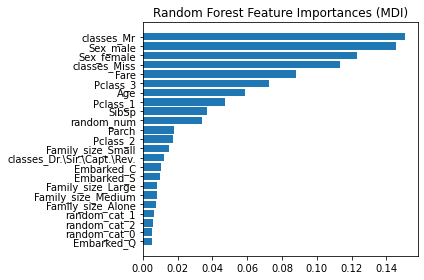

In [57]:
ohe = (rf.named_steps['preprocess']
         .named_transformers_['cat'])
feature_names = ohe.get_feature_names(input_features=categorical_columns)
feature_names = np.r_[feature_names, numerical_columns]

tree_feature_importances = (
    rf.named_steps['classifier'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()
# Reference: https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py

This shows that the low cardinality categorical feature, sex and classes is the most important feature.

Also note that both random features have very low importances (close to 0) as expected.

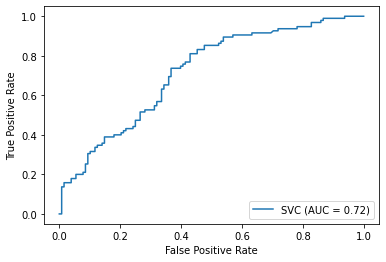

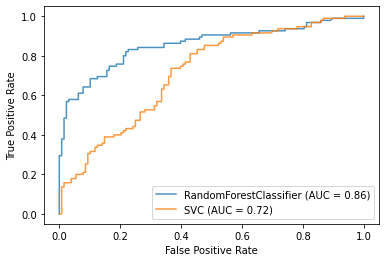

In [58]:
from sklearn.svm import SVC

from sklearn.metrics import plot_roc_curve


X = Xdummies_df
y = Ydummies_df

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
svc = SVC(random_state=1)
svc.fit(X_train, y_train)
# Next, we plot the ROC curve with a single call to 
# sklearn.metrics.plot_roc_curve. The returned svc_disp 
# object allows us to continue using the already computed 
# ROC curve for the SVC in future plots.
svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()

# We train a random forest classifier and create a plot comparing it to the 
# SVC ROC curve. Notice how svc_disp uses plot to plot the SVC ROC curve 
# without recomputing the values of the roc curve itself. Furthermore, 
# we pass alpha=0.8 to the plot functions to adjust the alpha values of 
# the curves.
# Reference: https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_roc_curve_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-roc-curve-visualization-api-py
rfc = winner
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

Resultado da classificação 81.65%


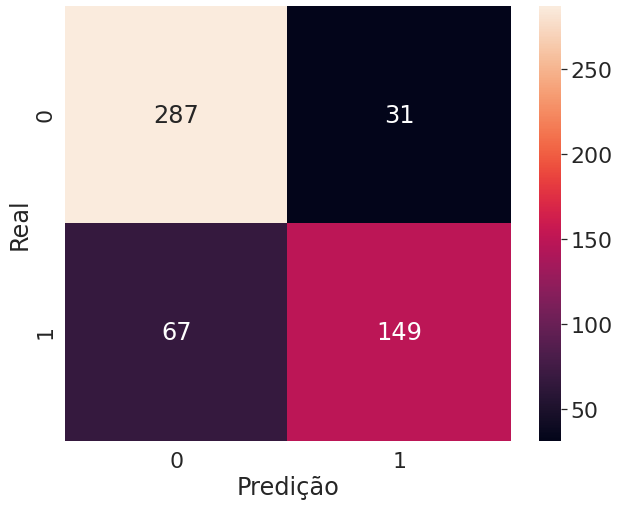

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
import seaborn as sns
import matplotlib.pyplot as plt



train_data2 = train_data
test_data2 = test_data
treino_x, teste_x, treino_y, teste_y = train_data_x, test_data2, train_mark_y, test_mark

classificador = winner
classificador.fit(treino_x, treino_y)



selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 9, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, teste_y)* 100))

In [60]:
table_result_modifi = test_data_final
table_result_modifi['Survived'] = Best_result_modifi.Survived
table_result_modifi

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,classes,Family_size,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,Medium,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Miss,Alone,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,Alone,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,Alone,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Miss,Small,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S,Mr,Alone,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Miss,Alone,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,Alone,0
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S,Mr,Medium,0


In [61]:
import plotly.graph_objects as go
Series_1 = table_result_modifi.query('Survived == 1')
Series_2 = table_result_modifi.query('Survived == 0')
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=Series_1['PassengerId'], 
                           y=Series_1['Age'], z=Series_1['Pclass'],name='Survived', 
                           mode='markers', 
                           marker=dict(size=5,
                           color='green',                # set color to an array/list of desired values
                           colorscale='Viridis',   # choose a colorscale
                           opacity=0.8),
                           text= 'agrupador'))

fig.add_trace(go.Scatter3d(x=Series_2['PassengerId'], 
                           y=Series_2['Age'], z=Series_2['Pclass'],name='Not Survived', 
                           mode='markers', 
                           marker=dict(size=5,
                           color='red',                # set color to an array/list of desired values
                           colorscale='Viridis',   # choose a colorscale
                           opacity=0.8),
                           text= 'agrupador'))

fig.update_layout(scene=dict(xaxis_title='PassengerId',
                             yaxis_title='Age', zaxis_title='Pclass'))

fig.update_layout(scene = dict(
                    zaxis = dict(
                        ticktext= ['1º - Class','2º - Class','3º - Class'],
                        tickvals= [1, 2, 3]))                    
                  )
# fig.update_layout(showlegend=True)

# fig.update_layout(legend_title_text = "Status")

fig.show()

References: 
* https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py

*  https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial/notebook